### <center> Diabetes Detection Using Classification Methods (Logistic Regression, Decision Tree, Random Forest, XGBClassifier, Support Vector Machine, Naive Bayes, K Nearest Neighbors). </center>

# Introduction
The purpose of this notebook is to analyze the data and then modelize the diabetes based on the features given in the dataset.

To reach this goal, we will follow the following steps:

- Produce an exploratory analysis of the data, the role of which is to assess the quality of the data and especially to identify highly correlated features
- Build a model based on stacking
- Optimize this model in terms of the number of basic models and the number of features.

# Content <a id = "cont"></a>
- [Dataset Insepection](#1)
- [Data Cleaning](#2)
- [Exploratory Data Analysis](#3)
- [Model Building](#4)
    - [Grid Search CV](#grid_search_cv)
- [Support Vector Machine Model](#5)
- [Prediction Diabetes](#6)
- [Conclusion](#7)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from scipy.stats import norm

In [2]:
import warnings 
warnings.filterwarnings("ignore")

# Dataset Inspection <a id = "1"></a>
[Go Content](#cont) 

In [3]:
# Read Dataset
df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")

print("Shape:", df.shape)
df.head()

Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Dataset description
- Pregnancies: To express the Number of pregnancies

- Glucose: To express the Glucose level in blood

- BloodPressure: To express the Blood pressure measurement

- SkinThickness: To express the thickness of the skin

- Insulin: To express the Insulin level in blood

- BMI: To express the Body mass index

- DiabetesPedigreeFunction: To express the Diabetes percentage

- Age: To express the age

- Outcome: To express the final result 1 is Yes and 0 is No

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print("Unique Value:", df['Outcome'].unique())
print("Value Counts:", df['Outcome'].value_counts())

Unique Value: [1 0]
Value Counts: Outcome
0    500
1    268
Name: count, dtype: int64


In [7]:
# Count the number of unique value in dataset
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


#  Data Cleaning <a id = "2"></a>
[Go Content](#cont) 

In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Find the Outliers

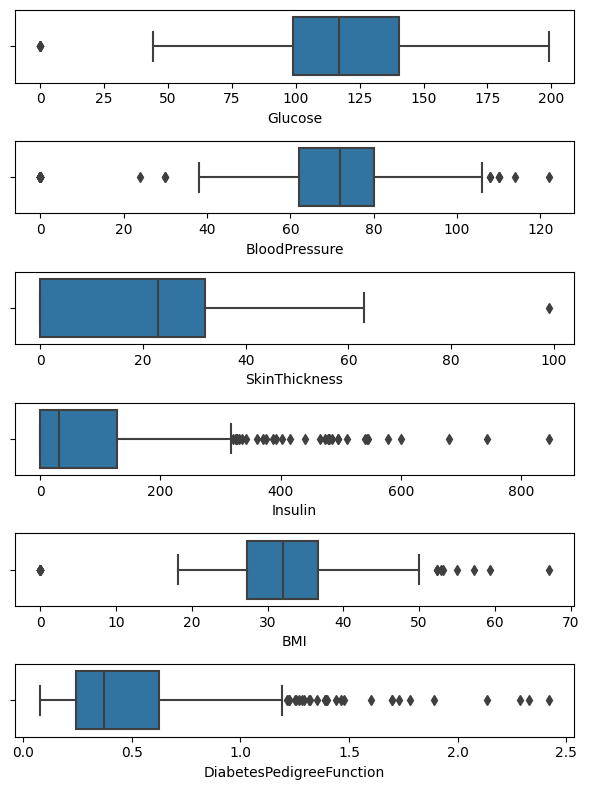

In [10]:
# Find Outliers using Boxplot
fig, axes = plt.subplots(6, 1, figsize=(6, 8))

sns.boxplot(x=df['Glucose'], ax=axes[0])
sns.boxplot(x=df['BloodPressure'], ax=axes[1])
sns.boxplot(x=df['SkinThickness'], ax=axes[2])
sns.boxplot(x=df['Insulin'], ax=axes[3])
sns.boxplot(x=df['BMI'], ax=axes[4])
sns.boxplot(x=df['DiabetesPedigreeFunction'], ax=axes[5])

plt.tight_layout()
plt.show()

In [11]:
# Remove Outliers on Insulin Columns
max_threshold = df['Insulin'].quantile(0.95)
print("Max Threshold:", max_threshold)

print("Number of Row Deleted:", df[(df['Insulin'] > max_threshold) ].shape[0])
df = df[(df['Insulin'] < max_threshold) ]

Max Threshold: 293.0
Number of Row Deleted: 38


In [12]:
# Remove Outliers on DiabetesPedigreeFunction Columns
max_threshold = df['DiabetesPedigreeFunction'].quantile(0.95)
print("Max Threshold:", max_threshold)

print("Number of Row Deleted:", df[(df['DiabetesPedigreeFunction'] > max_threshold) ].shape[0])
df = df[(df['DiabetesPedigreeFunction'] < max_threshold) ]

Max Threshold: 1.1224499999999997
Number of Row Deleted: 37


In [13]:
# New Dataset
print("Shape:", df.shape)
df.head()

Shape: (691, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


# Exploratory Data Analysis <a id = "3"></a>
[Go Content](#cont) 

In [14]:
# Correlation with outcome value
df.corr()['Outcome']

Pregnancies                 0.227355
Glucose                     0.464200
BloodPressure               0.055101
SkinThickness               0.029521
Insulin                     0.077266
BMI                         0.294879
DiabetesPedigreeFunction    0.153148
Age                         0.234693
Outcome                     1.000000
Name: Outcome, dtype: float64

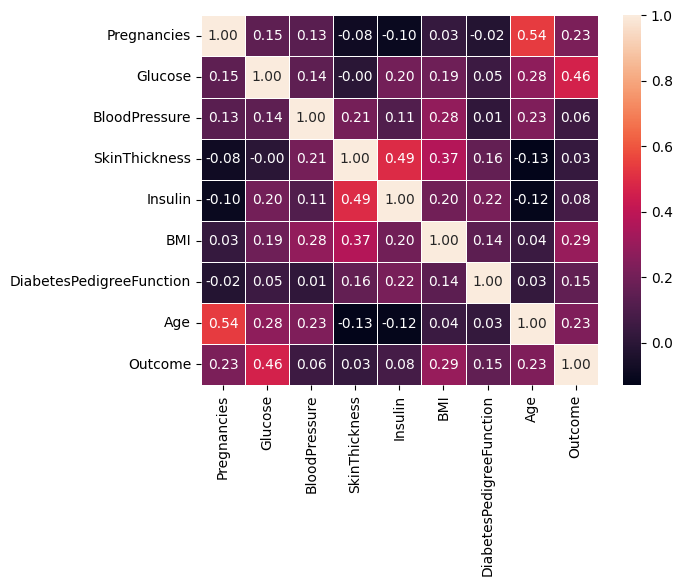

In [15]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", lw=0.5)
plt.show()

In [16]:
df.groupby("Outcome").size()

Outcome
0    468
1    223
dtype: int64

## Analyze the distribution of data in the dataset.

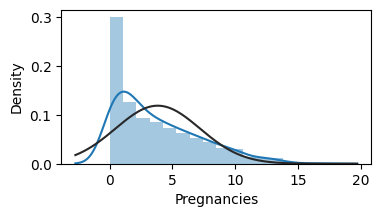

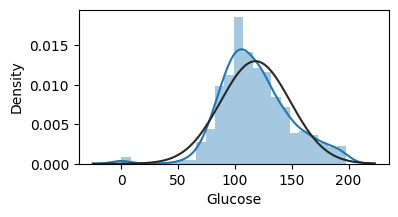

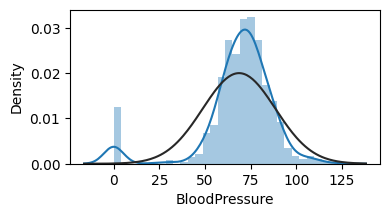

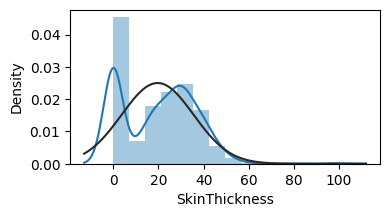

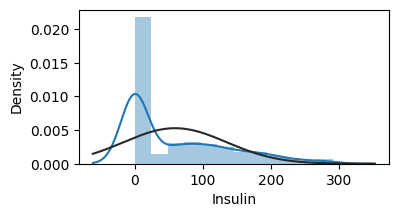

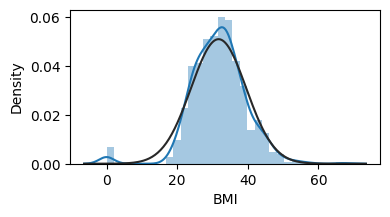

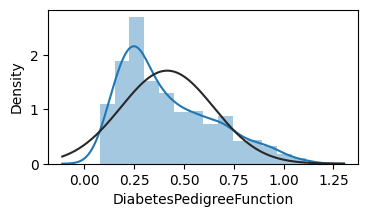

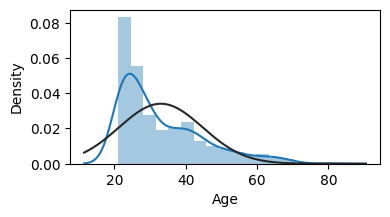

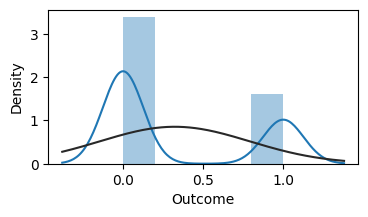

In [17]:
for i in df.columns:
    plt.figure(figsize=(4,2))
    sns.distplot(df[i], fit = norm)
    plt.show()

# Model Building<a id = "4"></a>
[Go Content](#cont) 

In [18]:
X = df.drop("Outcome", axis="columns")
y = df['Outcome']

In [19]:
scaler = StandardScaler()
X_Scale = scaler.fit_transform(X)
X_Scale[0:3]

array([[ 0.64391379,  0.97477094,  0.16616094,  0.96385222, -0.78417478,
         0.23930783,  0.90665607,  1.45107622],
       [-0.84220655, -1.07789212, -0.13467018,  0.58788728, -0.78417478,
        -0.65536829, -0.27836695, -0.1705768 ],
       [ 1.23836193,  2.11513931, -0.23494722, -1.22927657, -0.78417478,
        -1.07714417,  1.09986635, -0.08522664]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (552, 8)
X_test shape: (139, 8)


## Find the best Model using GridSearchCV <a id="grid_search_cv"> </a>
[Goto Content](#cont)

In [21]:
model_params = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            "C": [1.0, 2.0],
            "max_iter": [200, 300],
            "penalty" : ["l1","l2"], 
            "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [ 70, 100],
            "criterion" : ["gini", "entropy","log_loss"], 
            "max_features" : ["sqrt","log2", None], 
            "class_weight" : ["balanced", "balanced_subsample"]
        }
    },
    "Support Vector Machine": {
        "model": SVC(),
        "params": {
            "C": [0.001, 0.01, 0.1, 0.2],
            "kernel": ["linear", "rbf"]
        }
    },
    "GaussianNB": {
        "model": GaussianNB(),
        "params": {
            "var_smoothing": [0.000000000001]
        }
    },
    "KNeighbors": {
        "model": KNeighborsClassifier(),
        "params" : {
            "n_neighbors": [12, 14, 18],
            "weights" : ["uniform", "distance"], 
            "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"], 
            "p" : [1,2]
        }
    },
    "XGBoost Classification": {
        "model": XGBClassifier(),
        "params": {
            'n_estimators': [ 15, 20, 25],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [ 1, 2, 3],
            'gamma': [0.0001, 0.001, 0.01 ]
        }
    }
}

In [22]:
scores = []

for model, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        "Model": model,
        "Best Score": clf.best_score_,
        "Best Params": clf.best_params_
    })


In [23]:
clf_data_frame = pd.DataFrame(scores, columns=["Model", "Best Score", "Best Params"])
clf_data_frame

,Model,Best Score,Best Params
0,Logistic Regression,0.780033,"{'C': 2.0, 'max_iter': 200, 'penalty': 'l2', '..."
1,Random Forest,0.777166,"{'class_weight': 'balanced', 'criterion': 'log..."
2,Support Vector Machine,0.787280,"{'C': 0.1, 'kernel': 'linear'}"
3,GaussianNB,0.759796,{'var_smoothing': 1e-12}
4,KNeighbors,0.784339,"{'algorithm': 'auto', 'n_neighbors': 14, 'p': ..."
5,XGBoost Classification,0.775727,"{'gamma': 0.0001, 'learning_rate': 0.1, 'max_d..."


**Comment:** Support Vector Machine Show the Best Score.

# Support Vector Machine Model  <a id = "5"></a>
[Go Content](#cont) 

In [24]:
svm_model = SVC(C=0.1, kernel="linear")
svm_model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [25]:
svm_model.score(X_test, y_test)

0.7338129496402878

# Diabetes Prediction  <a id = "6"></a>
[Go Content](#cont) 

In [26]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
65,5,99,74,27,0,29.0,0.203,32,0
418,1,83,68,0,0,18.2,0.624,27,0
238,9,164,84,21,0,30.8,0.831,32,1
620,2,112,86,42,160,38.4,0.246,28,0
158,2,88,74,19,53,29.0,0.229,22,0


In [27]:
features_data = {
    "Pregnancies": [9],
    "Glucose": [156],
    "BloodPressure": [86],
    "SkinThickness": [0],
    "Insulin": [0],
    "BMI": [24.8],
    "DiabetesPedigreeFunction": [0.230],
    "Age": [53]
}

outcome_pred = svm_model.predict(pd.DataFrame(features_data))
print(outcome_pred)

if outcome_pred[0] == 0:
    print("Person haven't Diabetes.")
else:
    print("Person have Diabetes")

[1]
Person have Diabetes


## Conclusion <a id = "7"></a>
[Go Content](#cont) 

Using Above this classification model we find that Support Vector Machine gives the best accuracy model.